In [1]:
#@title simple demo
from myAE import SDC_AE

manager = SDC_AE()
manager.prepare_data()
manager.prepare_model(2, 2, 'tanh')

def calc_loss(model, x, F):
  h = model.get_submodule("encoder")(x)
  pred = model.get_submodule("decoder")(h)
  likelihood = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
  return likelihood

hist = manager.train(calc_loss)

/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now, it is working on cuda:0.


100%|██████████| 5/5 [00:24<00:00,  4.90s/it]


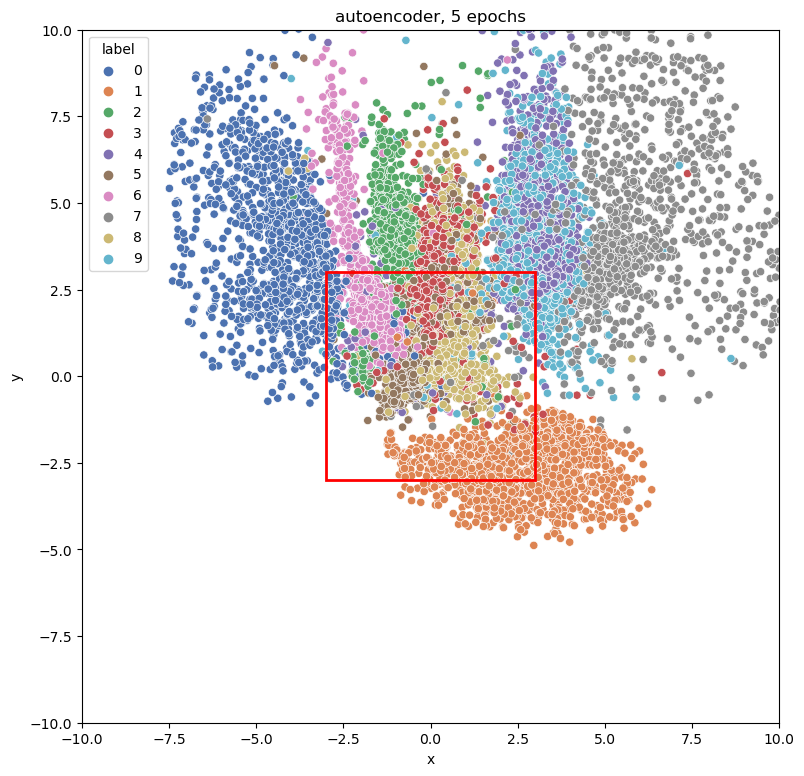

In [2]:
#@title show latent space
manager.show_latent_space('autoencoder, 5 epochs')

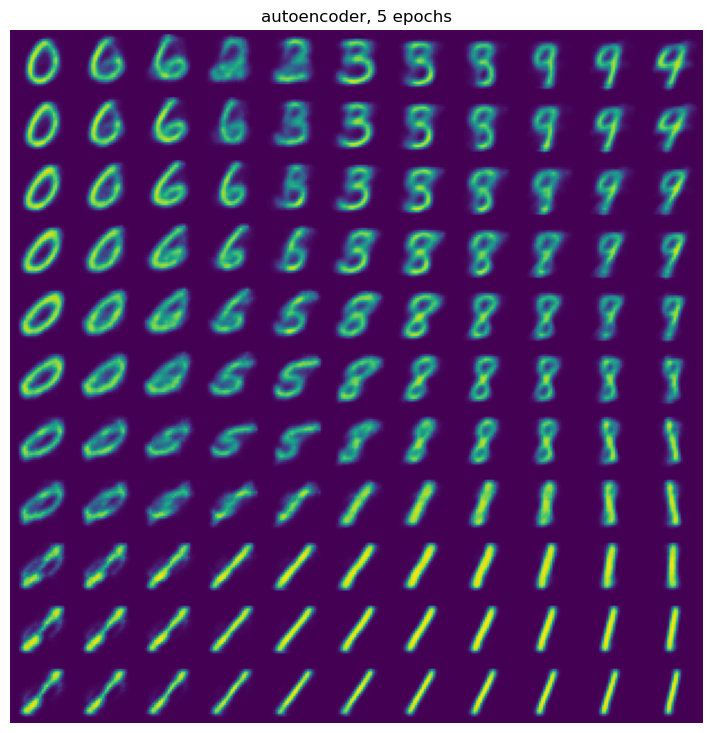

In [4]:
#@title show generated images
manager.plot_generated_images('autoencoder, 5 epochs')


In [5]:
#@title save model
manager.save_current_model('ae')